C:\Users\Admin\.conda\envs\Laboratory\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 23.163925494195087;
Epoch: 200; Error: 19.244592613643462;
Epoch: 300; Error: 15.847087523836198;
Epoch: 400; Error: 13.354301564930571;
Epoch: 500; Error: 11.692822607112856;
Epoch: 600; Error: 10.585355467792272;
Epoch: 700; Error: 9.2906930536048;
Epoch: 800; Error: 8.23592390032757;
Epoch: 900; Error: 6.878971930594874;
Epoch: 1000; Error: 6.261434055841338;
Epoch: 1100; Error: 5.813778531190944;
Epoch: 1200; Error: 5.439928577615337;
Epoch: 1300; Error: 5.0908235222211955;
Epoch: 1400; Error: 4.696953896921396;
Epoch: 1500; Error: 4.126363438188758;
Epoch: 1600; Error: 3.7914669019383274;
Epoch: 1700; Error: 3.4772543917035073;
Epoch: 1800; Error: 3.2737517293423757;
Epoch: 1900; Error: 3.1160514028213466;
Epoch: 2000; Error: 2.981648310903495;
Epoch: 2100; Error: 2.881148904015813;
Epoch: 2200; Error: 2.7920623806967297;
Epoch: 2300; Error: 2.7162214316979556;
Epoch: 2400; Error: 2.6515542603952955;
Epoch: 2500; Error: 2.614490369666183;
Epoch: 2600; Error: 2.5

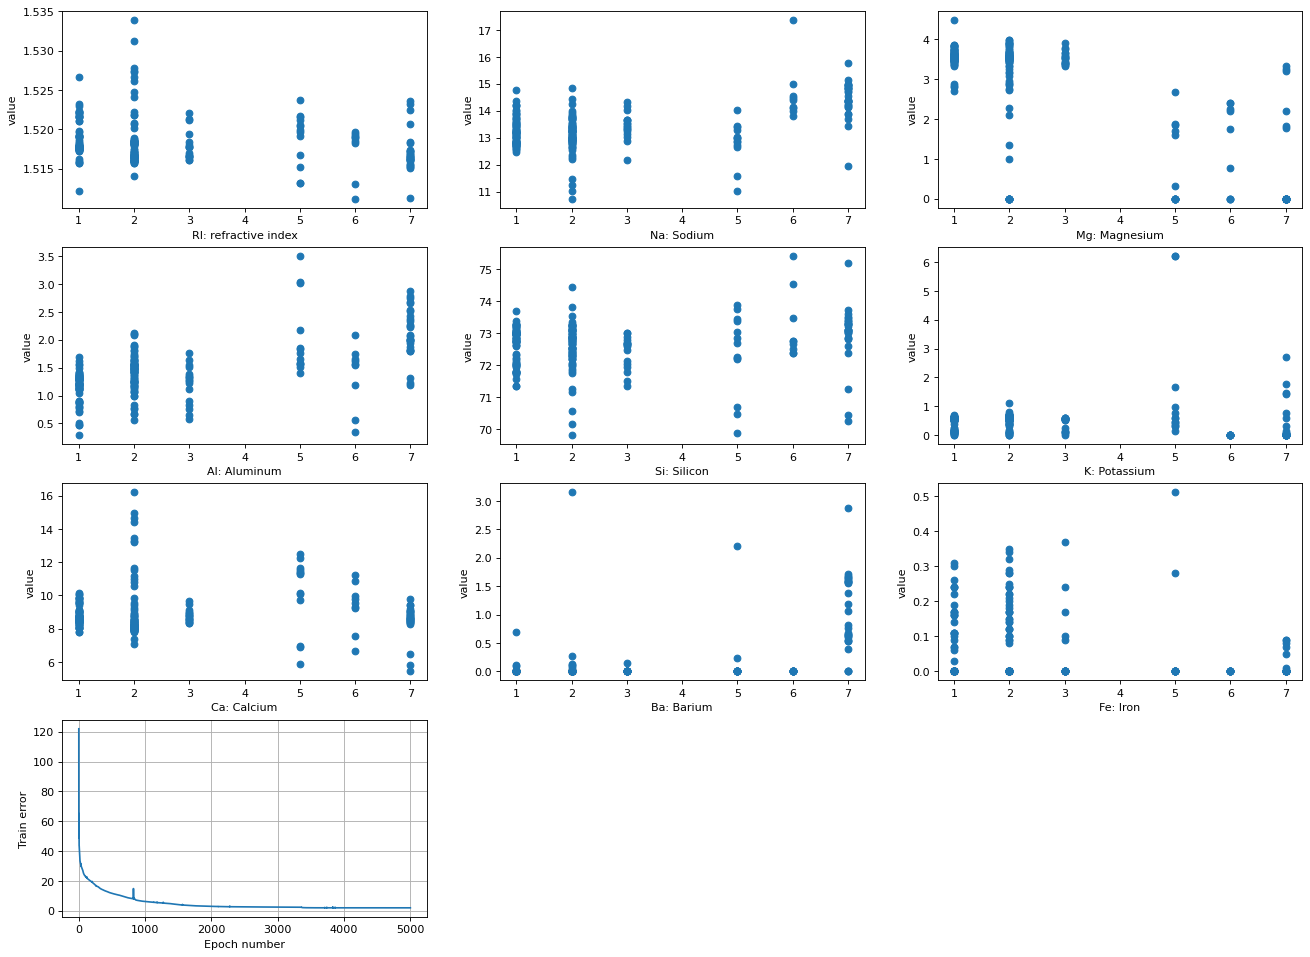

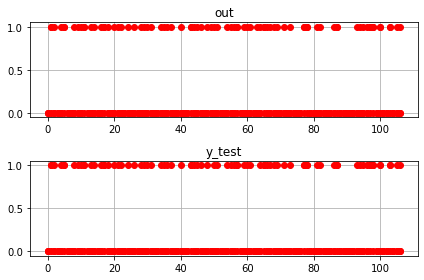

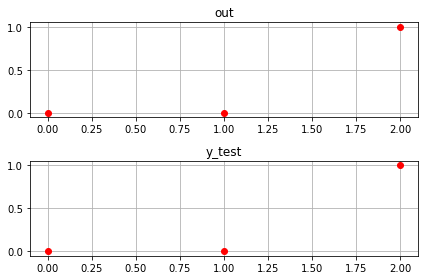

Epoch: 200; Error: 132.96868031490575;
Epoch: 400; Error: 132.90835695798967;
Epoch: 600; Error: 132.86986019199867;
Epoch: 800; Error: 132.843157462479;
Epoch: 1000; Error: 132.82354800073657;
Epoch: 1200; Error: 132.80853642926144;
Epoch: 1400; Error: 132.7966751077044;
Epoch: 1600; Error: 132.78706644274388;
Epoch: 1800; Error: 132.77912428981347;
Epoch: 2000; Error: 132.772449644039;
Epoch: 2200; Error: 132.76676147113773;
Epoch: 2400; Error: 132.76185610671777;
Epoch: 2600; Error: 132.75758234415292;
Epoch: 2800; Error: 132.7538255661245;
Epoch: 3000; Error: 132.75049730800484;
The maximum number of train epochs is reached


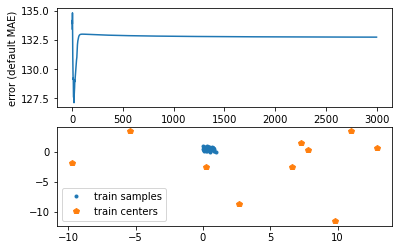

In [6]:
import neurolab as nl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
#import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


### Loading data from "Glass Identification.data" dataset
dataset = pd.read_csv("Glass Identification.data", header=None) 
input = dataset.values

### Loading target from the last column
targetSup = input[:,10]

### Delete first and last column
input = np.delete(input, -1, axis=1)
input = np.delete(input, 0, axis=1)


fig=plt.figure(figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')


plt.subplot(4,3,1)
plt.scatter(targetSup, input[:,0])
plt.xlabel('RI: refractive index')
plt.ylabel('value')

plt.subplot(4,3,2)
plt.scatter(targetSup, input[:,1])
plt.xlabel('Na: Sodium')
plt.ylabel('value')

plt.subplot(4,3,3)
plt.scatter(targetSup, input[:,2])
plt.xlabel('Mg: Magnesium')
plt.ylabel('value')

plt.subplot(4,3,4)
plt.scatter(targetSup, input[:,3])
plt.xlabel('Al: Aluminum')
plt.ylabel('value')

plt.subplot(4,3,5)
plt.scatter(targetSup, input[:,4])
plt.xlabel('Si: Silicon')
plt.ylabel('value')

plt.subplot(4,3,6)
plt.scatter(targetSup, input[:,5])
plt.xlabel('K: Potassium')
plt.ylabel('value')

plt.subplot(4,3,7)
plt.scatter(targetSup, input[:,6])
plt.xlabel('Ca: Calcium')
plt.ylabel('value')

plt.subplot(4,3,8)
plt.scatter(targetSup, input[:,7])
plt.xlabel('Ba: Barium')
plt.ylabel('value')

plt.subplot(4,3,9)
plt.scatter(targetSup, input[:,8])
plt.xlabel('Fe: Iron')
plt.ylabel('value')

### Scale the data [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
input = min_max_scaler.fit_transform(input)

# Initialize 2D container   
target = np.empty([214, 3])

# Fill the first column by 0
target[0:70,0] = 0
target[71:,0] = 0
# Fill the second column by 1 at rows <147-163> and <186-214>, elsewhere 0
target[0:146,1] = 0
target[147:163,1] = 1
target[164:185,1] = 0
target[186:214,1] = 1
# Filling the third column
target[0:70,2] = 0
target[71:146,2] = 1
target[147:176,2] = 0
target[177:185,2] = 1
target[186:214,2] = 1

### Supervised learning
net = nl.net.newff(nl.tool.minmax(input), [10, 10, 3])

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.50,)
min_max_scaler = preprocessing.MinMaxScaler()

# Output layer
net.layers[-1].transf = nl.trans.LogSig();
# Hidden layer
net.layers[0].transf = nl.trans.LogSig();
# Hidden layer
net.layers[1].transf = nl.trans.LogSig();

# Train the network
error = net.trainf = nl.train.train_rprop(net, input, target, epochs=5000, show=100, lr=0.3, goal=0.00001)

# Plot error
plt.subplot(4,3,10)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show()

error[-1]

out = net.sim(X_test)
out = np.around(out)
   
np.array_equal(out, y_test)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out,'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test,'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out[29],'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test[29],'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

### Unsupervised learning

# I choose 6 because we know that there are 6 categories 
netUnsup = nl.net.newc(nl.tool.minmax(input), 6)
error = net.trainf = nl.train.train_wta(netUnsup, input, epochs = 3000, show = 200)

# Plot results:
plt.title('Classification Problem')
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error (default MAE)')
w = net.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(input[:,3], input[:,4], '.', \
w[:,3], w[:,4], 'p')
plt.legend(['train samples', 'train centers'])
plt.show();



C:\Users\Admin\.conda\envs\Laboratory\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 22.558034272053234;
Epoch: 200; Error: 18.488538610437793;
Epoch: 300; Error: 15.39694423383869;
Epoch: 400; Error: 12.79187656601719;
Epoch: 500; Error: 10.60482240127765;
Epoch: 600; Error: 9.513308272146936;
Epoch: 700; Error: 8.663433497726368;
Epoch: 800; Error: 8.72936214118858;
Epoch: 900; Error: 9.37088572106397;
Epoch: 1000; Error: 9.079995565565353;
Epoch: 1100; Error: 8.858479481909871;
Epoch: 1200; Error: 8.68997799273559;
Epoch: 1300; Error: 8.53766342297976;
Epoch: 1400; Error: 8.397622420740198;
Epoch: 1500; Error: 8.163513955070947;
Epoch: 1600; Error: 8.003629462954077;
Epoch: 1700; Error: 7.8455911209318785;
Epoch: 1800; Error: 7.70194150484091;
Epoch: 1900; Error: 7.547121290323416;
Epoch: 2000; Error: 7.35195303491702;
Epoch: 2100; Error: 7.178050184154355;
Epoch: 2200; Error: 7.020341875493262;
Epoch: 2300; Error: 6.867784064598499;
Epoch: 2400; Error: 6.746185486857031;
Epoch: 2500; Error: 6.1236698345446445;
Epoch: 2600; Error: 6.03814282863789

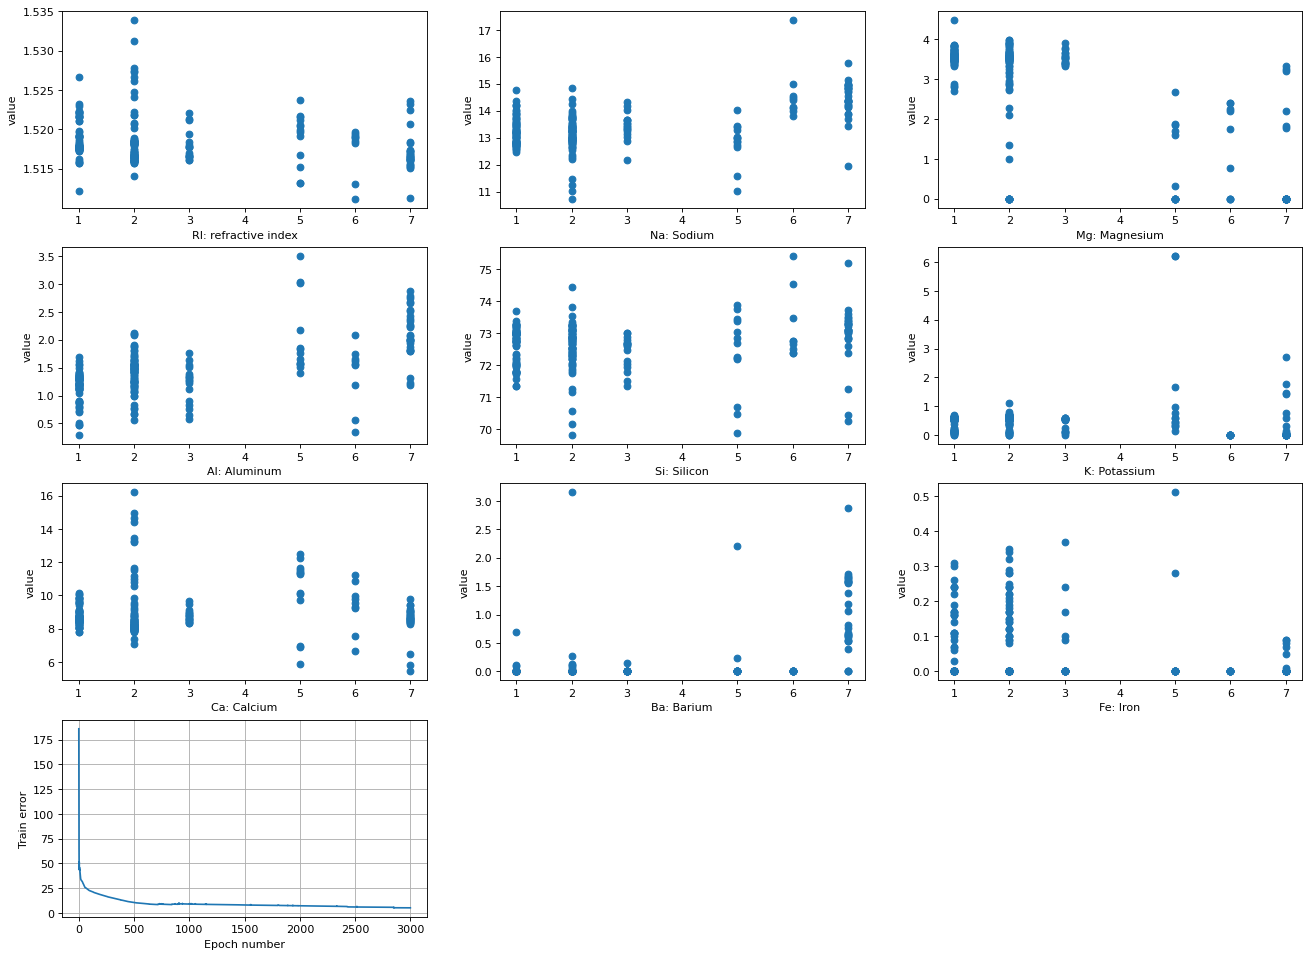

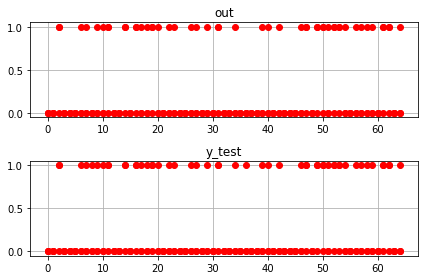

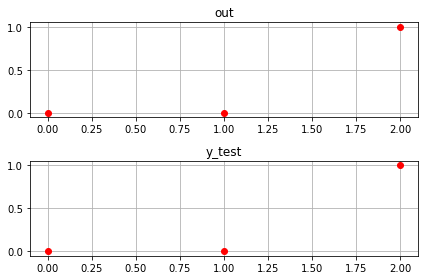

Epoch: 200; Error: 133.68266629584707;
Epoch: 400; Error: 133.68274199108114;
Epoch: 600; Error: 133.68274199162425;
Epoch: 800; Error: 133.68274199162428;
Epoch: 1000; Error: 133.68274199162428;
Epoch: 1200; Error: 133.68274199162428;
Epoch: 1400; Error: 133.68274199162428;
Epoch: 1600; Error: 133.68274199162428;
Epoch: 1800; Error: 133.68274199162428;
Epoch: 2000; Error: 133.68274199162428;
Epoch: 2200; Error: 133.68274199162428;
Epoch: 2400; Error: 133.68274199162428;
Epoch: 2600; Error: 133.68274199162428;
Epoch: 2800; Error: 133.68274199162428;
Epoch: 3000; Error: 133.68274199162428;
The maximum number of train epochs is reached


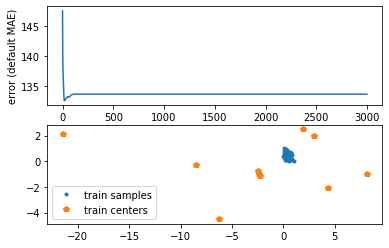

In [7]:
import neurolab as nl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
#import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


### Loading data from "Glass Identification.data" dataset
dataset = pd.read_csv("Glass Identification.data", header=None) 
input = dataset.values

### Loading target from the last column
targetSup = input[:,10]

### Delete first and last column
input = np.delete(input, -1, axis=1)
input = np.delete(input, 0, axis=1)


fig=plt.figure(figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')


plt.subplot(4,3,1)
plt.scatter(targetSup, input[:,0])
plt.xlabel('RI: refractive index')
plt.ylabel('value')

plt.subplot(4,3,2)
plt.scatter(targetSup, input[:,1])
plt.xlabel('Na: Sodium')
plt.ylabel('value')

plt.subplot(4,3,3)
plt.scatter(targetSup, input[:,2])
plt.xlabel('Mg: Magnesium')
plt.ylabel('value')

plt.subplot(4,3,4)
plt.scatter(targetSup, input[:,3])
plt.xlabel('Al: Aluminum')
plt.ylabel('value')

plt.subplot(4,3,5)
plt.scatter(targetSup, input[:,4])
plt.xlabel('Si: Silicon')
plt.ylabel('value')

plt.subplot(4,3,6)
plt.scatter(targetSup, input[:,5])
plt.xlabel('K: Potassium')
plt.ylabel('value')

plt.subplot(4,3,7)
plt.scatter(targetSup, input[:,6])
plt.xlabel('Ca: Calcium')
plt.ylabel('value')

plt.subplot(4,3,8)
plt.scatter(targetSup, input[:,7])
plt.xlabel('Ba: Barium')
plt.ylabel('value')

plt.subplot(4,3,9)
plt.scatter(targetSup, input[:,8])
plt.xlabel('Fe: Iron')
plt.ylabel('value')

### Scale the data [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
input = min_max_scaler.fit_transform(input)

# Initialize 2D container   
target = np.empty([214, 3])

# Fill the first column by 0
target[0:70,0] = 0
target[71:,0] = 0
# Fill the second column by 1 at rows <147-163> and <186-214>, elsewhere 0
target[0:146,1] = 0
target[147:163,1] = 1
target[164:185,1] = 0
target[186:214,1] = 1
# Filling the third column
target[0:70,2] = 0
target[71:146,2] = 1
target[147:176,2] = 0
target[177:185,2] = 1
target[186:214,2] = 1

### Supervised learning
net = nl.net.newff(nl.tool.minmax(input), [10, 10, 3])

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.30,)
min_max_scaler = preprocessing.MinMaxScaler()

# Output layer
net.layers[-1].transf = nl.trans.LogSig();
# Hidden layer
net.layers[0].transf = nl.trans.LogSig();
# Hidden layer
net.layers[1].transf = nl.trans.LogSig();

# Train the network
error = net.trainf = nl.train.train_rprop(net, input, target, epochs=3000, show=100, lr=0.3, goal=0.00001)

# Plot error
plt.subplot(4,3,10)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show()

error[-1]

out = net.sim(X_test)
out = np.around(out)
   
np.array_equal(out, y_test)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out,'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test,'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out[29],'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test[29],'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

### Unsupervised learning

# we choose 7 because we know that there are 7 categories
netUnsup = nl.net.newc(nl.tool.minmax(input), 6)
error = net.trainf = nl.train.train_wta(netUnsup, input, epochs = 3000, show = 200)

# Plot results:
plt.title('Classification Problem')
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error (default MAE)')
w = net.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(input[:,3], input[:,4], '.', \
w[:,3], w[:,4], 'p')
plt.legend(['train samples', 'train centers'])
plt.show();

